In [1]:
import matplotlib;


#import seaborn as sns
%pylab inline
#from netCDF4 import Dataset
import matplotlib.pyplot as plt;
import pickle

from pylab import *;
#import cartopy as cp
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
asin=np.arcsin
sqrt=np.sqrt
sin=np.sin
cos=np.cos
pi=np.pi
exp=np.exp
tan=np.tan
I=1j
inf=np.inf
pi=np.pi

import pandas as pd;

import cartopy as ct


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'

with open('DetStatic.pkl', 'rb') as f:
    DetStatic = pickle.load(f)
    
with open(largePath+'PhySmall.pkl', 'rb') as f:
    PhySmall = pickle.load(f)

with open(largePath+'PhyLarge.pkl', 'rb') as f:
    PhyLarge = pickle.load(f)
    
with open(largePath+'HeightVec.pkl', 'rb') as f:
    HeightVec = pickle.load(f)

with open(largePath+'EMatSm.pkl', 'rb') as f:
    EMatSm = pickle.load(f)
    
with open(largePath+'EMatLg.pkl', 'rb') as f:
    EMatLg = pickle.load(f)
    
with open(largePath+'LMatSm.pkl', 'rb') as f:
    LMatSm = pickle.load(f)
    
with open(largePath+'LMatLg.pkl', 'rb') as f:
    LMatLg = pickle.load(f)
    
with open(largePath+'NDetMat.pkl', 'rb') as f:
    NDetMat = pickle.load(f)

In [15]:

with open('latGrid.pkl', 'rb') as f:
    lat = pickle.load(f)
    
with open('lonGrid.pkl', 'rb') as f:
    lon = pickle.load(f)
    

In [34]:
with open(largePath+'PO4Mat.pkl', 'rb') as f:
    PO4Mat = pickle.load(f)

In [3]:
ProdNormMat = NDetMat/sum(NDetMat,0)

In [4]:
SmallBioNormalization = np.array(PhySmall[:,:,:,:])*np.reshape(np.array(HeightVec),(1,35,1,1))/np.reshape(nansum(PhySmall[:,:,:,:]*np.reshape(np.array(HeightVec),(1,35,1,1)),1),(240,1,576,720))
SmallBioNormalization[SmallBioNormalization>1] = NaN

In [5]:
LargeBioNormalization = np.array(PhyLarge[:,:,:,:])*np.reshape(np.array(HeightVec),(1,35,1,1))/np.reshape(nansum(PhyLarge[:,:,:,:]*np.reshape(np.array(HeightVec),(1,35,1,1)),1),(240,1,576,720))
LargeBioNormalization[LargeBioNormalization>1] = NaN

In [ ]:
#LargeBioNormalization = np.array(LowLightSeriesPhyLarge[:,:,:,:])*np.reshape(np.array(HeightVec),(1,35,1,1))/sum(LowLightSeriesPhyLarge[:,:,:,:]*np.reshape(np.array(HeightVec),(1,35,1,1)),1)

In [6]:
LpNormalization = LargeBioNormalization*np.reshape(NDetMat[:,:,:],(240,1,576,720))/sum(LargeBioNormalization*np.reshape(NDetMat[:,:,:],(240,1,576,720)),0)
SpNormalization = SmallBioNormalization*np.reshape(NDetMat[:,:,:],(240,1,576,720))/sum(SmallBioNormalization*np.reshape(NDetMat[:,:,:],(240,1,576,720)),0)


In [8]:
#Depth = 5
#Month = 234

EOptLpAvg = nansum(nansum(EMatLg[:,:,:,:]*LargeBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)
LOptLpAvg =  nansum(nansum(LMatLg[:,:,:,:]*LargeBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)
EOptSpAvg = nansum(nansum(EMatSm[:,:,:,:]*SmallBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)
LOptSpAvg =  nansum(nansum(LMatSm[:,:,:,:]*SmallBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)



In [10]:
alpha = 0.25
gamma = 0.2
r_sm = 1.0
r_lg = 5.0
S_Sm = alpha/r_sm+gamma
S_Lg = alpha/r_lg+gamma

InvMatSmall = EMatSm[:,:,:,:]+LMatSm[:,:,:,:]+S_Sm
InvMatLarge = EMatLg[:,:,:,:]+LMatLg[:,:,:,:]+S_Lg

In [11]:
InvSpAvg = nansum(nansum(InvMatSmall*SmallBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)
InvLpAvg =  nansum(nansum(InvMatLarge*LargeBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)


In [12]:
InvMatLgAvg = EOptLpAvg+LOptLpAvg+S_Lg
InvMatSmAvg = EOptSpAvg+LOptSpAvg+S_Sm

In [13]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/EOptLpAvg.pkl', 'wb')

pickle.dump(EOptLpAvg, output)

output.close()

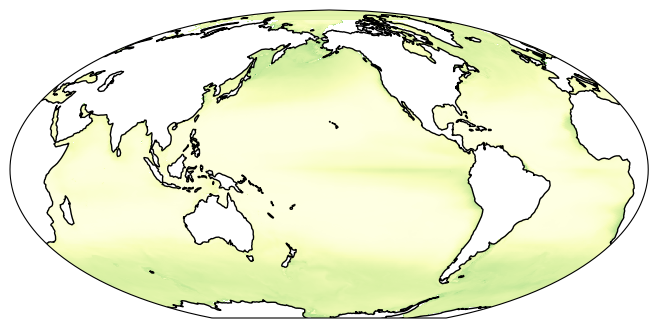

In [16]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,EOptLpAvg,vmin=0,vmax=0.6,transform=proj2,cmap="YlGn")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("EInvLg.png",bbox_inches="tight",dpi=300)

In [17]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/LOptLpAvg.pkl', 'wb')

pickle.dump(LOptLpAvg, output)

output.close()

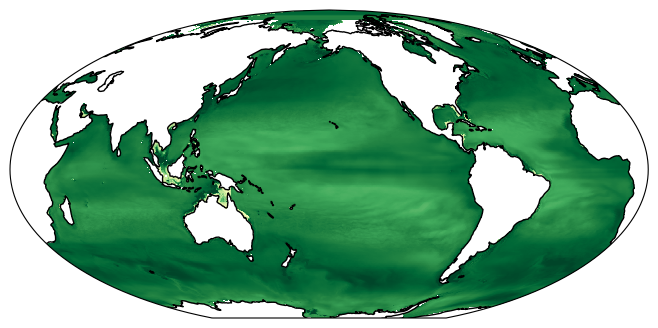

In [18]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,LOptLpAvg,vmin=0.0,vmax=0.6,transform=proj2,cmap="YlGn")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("LInvLg.png",bbox_inches="tight",dpi=300)

In [20]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/InvLpAvg.pkl', 'wb')

pickle.dump(InvLpAvg, output)

output.close()

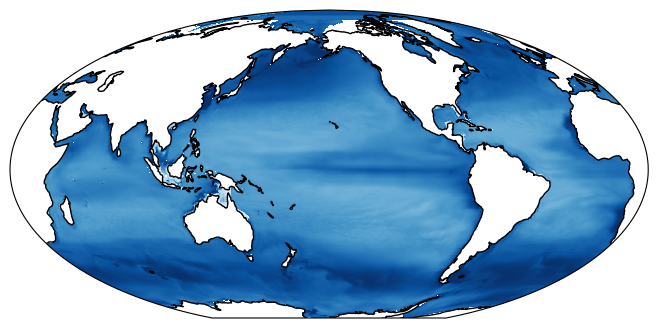

In [29]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,InvLpAvg,vmin=0.25,vmax=1.0,transform=proj2,cmap="Blues")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)


In [22]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/EOptSpAvg.pkl', 'wb')

pickle.dump(EOptSpAvg, output)

output.close()

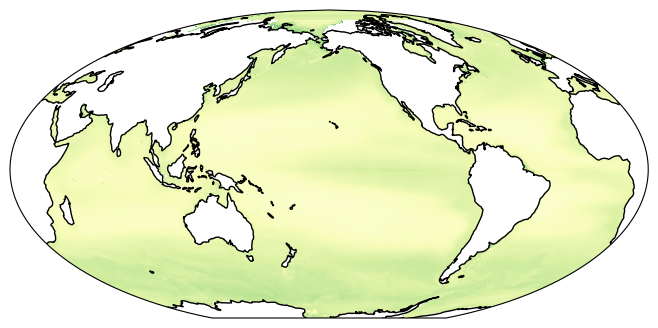

In [23]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,EOptSpAvg,vmin=0,vmax=0.6,transform=proj2,cmap="YlGn")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("EInvSm.png",bbox_inches="tight",dpi=300)

In [24]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/LOptSpAvg.pkl', 'wb')

pickle.dump(LOptSpAvg, output)

output.close()

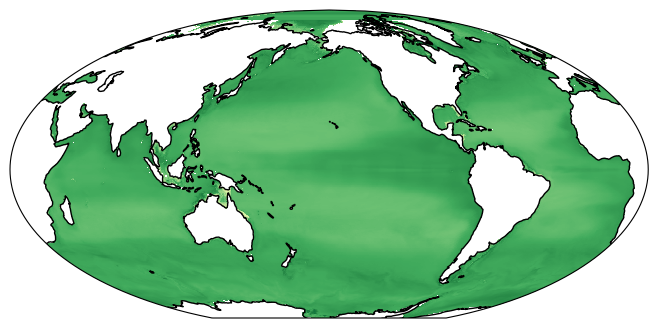

In [25]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,LOptSpAvg,vmin=0,vmax=0.6,transform=proj2,cmap="YlGn")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("LInvSm.png",bbox_inches="tight",dpi=300)

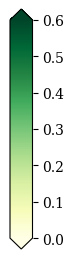

In [26]:
a = np.array([[0,0.6]])
plt.figure(figsize=(0.5,4))
img = plt.imshow(a, cmap="YlGn")
plt.gca().set_visible(False)
cax = plt.axes([0.15, 0.3, 0.45, 0.6])
plt.colorbar(cax=cax,extend="both")
#plt.savefig("InvColorbar.png",bbox_inches="tight")

In [27]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/InvSpAvg.pkl', 'wb')

pickle.dump(InvSpAvg, output)

output.close()

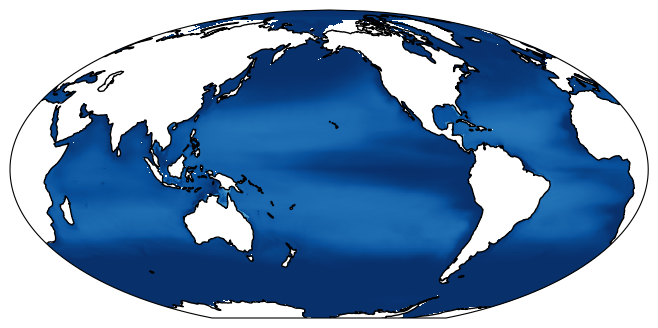

In [28]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,InvSpAvg,vmin=0.25,vmax=1.0,transform=proj2,cmap="Blues")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("InvSmallTotal.png",bbox_inches="tight",dpi=300)

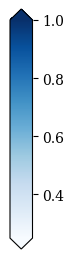

In [30]:
a = np.array([[0.25,1]])
plt.figure(figsize=(0.5,4))
img = plt.imshow(a, cmap="Blues")
plt.gca().set_visible(False)
cax = plt.axes([0.15, 0.3, 0.45, 0.6])
plt.colorbar(cax=cax,extend="both")
#plt.savefig("InvTotalColorbar.png",bbox_inches="tight")

In [31]:
EFracSm = EOptSpAvg/InvSpAvg
EFracLg = EOptLpAvg/InvLpAvg

LFracSm = LOptSpAvg/InvSpAvg
LFracLg = LOptLpAvg/InvLpAvg

SFracSm =S_Sm/InvSpAvg
SFracLg = S_Lg/InvLpAvg

In [36]:
PStorMaxSm = 0.01
PStorMaxLg = 0.025
PStorMaxDi = 0.01

KPStorSm = 2.5e-8*1e3
KPStorLg = 10e-7*1e3
KPStorDi = 10e-7*1e3

maxDepth = 10
PStorSm = PO4Mat*PStorMaxSm/(PO4Mat[:,:,:,:]+KPStorSm)*S_Sm
PStorLg = PO4Mat[:,:,:,:]*PStorMaxLg/(PO4Mat[:,:,:,:]+KPStorLg)*InvMatLarge
#PStorDi = LowLightSeriesPO4["po4"][:,:,:,:]*PStorMaxDi/(LowLightSeriesPO4["po4"][:,0:maxDepth,:,:]+KPStorDi)



/app/conda/miniconda/lib/python3.9/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [37]:
PE = 0.05
PExtraSm = 0.0035 
PExtraLg = 0.005
PExtraDi = 0.002

PStorSmAvg = nansum(nansum(PStorSm[:,:,:,:]*SmallBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)
PStorLgAvg = nansum(nansum(PStorLg[:,:,:,:]*LargeBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)

In [38]:
PExtraSmAvg = nansum(nansum(PExtraSm*SmallBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)
PExtraLgAvg = nansum(nansum(PExtraLg*LargeBioNormalization[:,:,:,:]*np.reshape(ProdNormMat,(240,1,576,720)),0),0)


TotalPSm = (PE*EOptSpAvg+PExtraSm+PStorSmAvg)
TotalPLg = (PE*EOptLpAvg+PExtraLg+PStorLgAvg)

PFracELg = PE*EOptLpAvg/TotalPLg
PFracESm = PE*EOptSpAvg/TotalPSm
PFracStorLg = PStorLgAvg/TotalPLg
PFracStorSm = PStorSmAvg/TotalPSm
PFracExtraLg = PExtraLgAvg/TotalPLg
PFracExtraSm = PExtraSmAvg/TotalPSm

In [39]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/PFracExtraLg.pkl', 'wb')

pickle.dump(PFracExtraLg, output)

output.close()

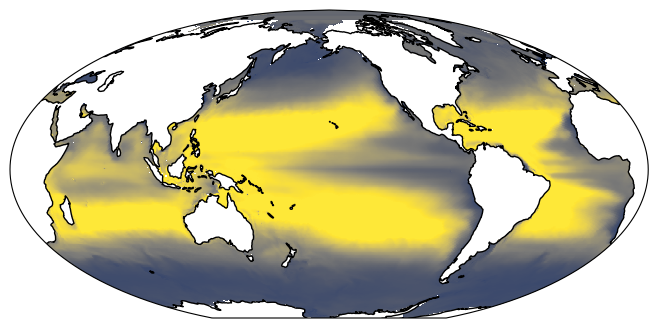

In [40]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()


ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,PFracExtraLg,vmin=0,vmax=0.8,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("PFracExtraLg.png",bbox_inches="tight",dpi=300)

In [41]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/PFracELg.pkl', 'wb')

pickle.dump(PFracELg, output)

output.close()

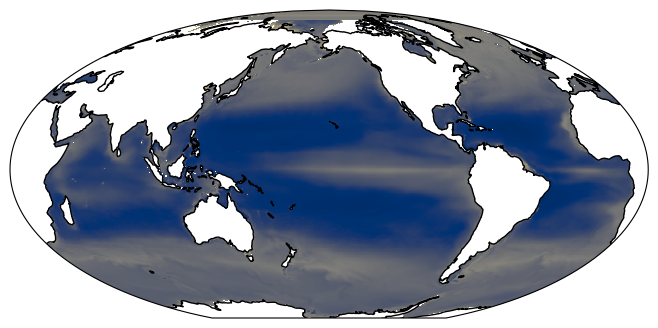

In [43]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,PFracELg,vmin=0,vmax=0.8,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("PFracELg.png",bbox_inches="tight",dpi=300)

In [44]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/PFracStorLg.pkl', 'wb')

pickle.dump(PFracStorLg, output)

output.close()

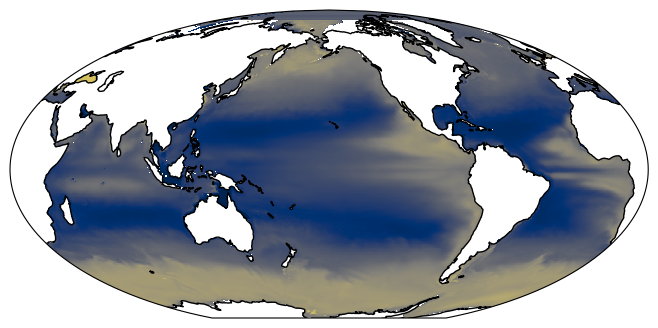

In [45]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

depth = 0

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,PFracStorLg,vmin=0,vmax=0.8,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("PFracStorLg.png",bbox_inches="tight",dpi=300)

In [46]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/PFracExtraSm.pkl', 'wb')

pickle.dump(PFracExtraSm, output)

output.close()

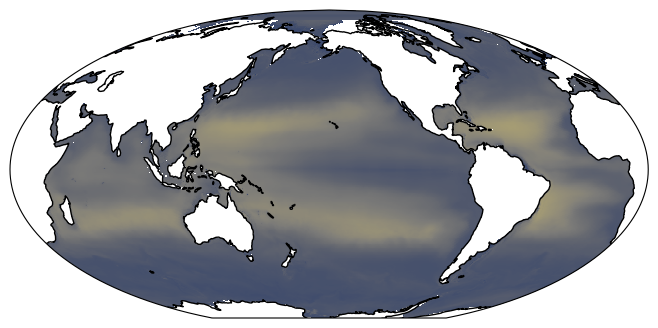

In [48]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,PFracExtraSm,vmin=0,vmax=0.8,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("PFracExtraSm.png",bbox_inches="tight",dpi=300)

In [49]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/PFracESm.pkl', 'wb')

pickle.dump(PFracESm, output)

output.close()

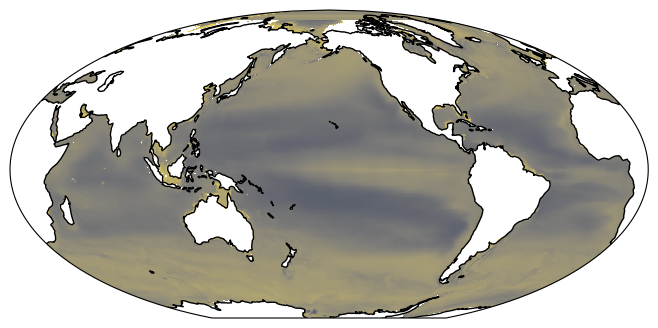

In [50]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()


ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,PFracESm,vmin=0,vmax=0.8,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("PFracESm.png",bbox_inches="tight",dpi=300)

In [52]:
largePath = '/archive/George.Hagstrom/variableNP/DataForBGCPaper/'


output = open(largePath+'/PFracStorSm.pkl', 'wb')

pickle.dump(PFracStorSm, output)

output.close()

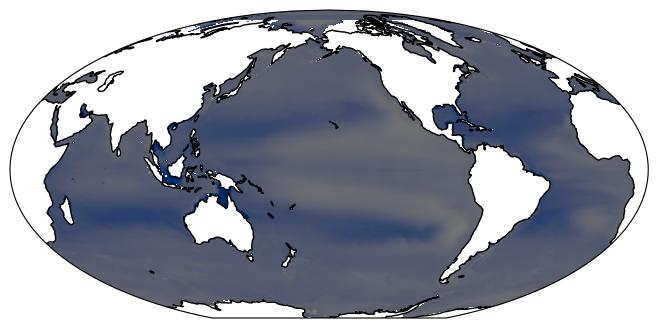

In [53]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()

ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,PFracStorSm,vmin=0,vmax=0.8,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("PFracStorSm.png",bbox_inches="tight",dpi=300)

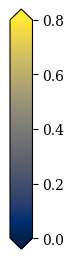

In [54]:
a = np.array([[0.0,0.8]])
plt.figure(figsize=(0.5,4))
img = plt.imshow(a, cmap="cividis")
plt.gca().set_visible(False)
cax = plt.axes([0.15, 0.3, 0.45, 0.6])
plt.colorbar(cax=cax,extend="both")
#plt.savefig("PFracColorbar.png",bbox_inches="tight")